In [1]:
## we need to plot cumulative distribution function of Fisher(1, alpha2, beta) and GPD(alpha2, beta) on one plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pystan
from pystan import StanModel 
from numpy import polyval, place, extract, any, asarray, nan, inf, pi
from numpy import (where, arange, putmask, ravel, sum, shape,
                   log, sqrt, exp, arctanh, tan, sin, arcsin, arctan,
                   tanh, cos, cosh, sinh, log1p, expm1)

from scipy.stats import rv_continuous
from scipy.stats import f
from prettytable import PrettyTable
import datetime
import os # to save file to a selected directories, which do not need to be created


In [3]:
class GPD_gen(rv_continuous):
#     def _argcheck(self, c):
#         c = asarray(c)
#         self.b = where(c < 0, 1.0/abs(c), inf)
#         return where(c == 0, 0, 1)

# but when both pdf and cdf are defined there is an error! 
#     def _pdf(self, x, alpha, beta):
#         return(alpha / beta * pow( 1 + x / beta, asarray(-alpha - 1) )

    def _cdf(self, x, alpha, beta):
        return 1 - pow(1 + x / beta, asarray(- alpha))  
#     def _ppf(self, q, c):
#         vals = 1.0/c * (pow(1-q, -c)-1)
#         return vals

#     def _munp(self, n, c):
#         k = arange(0, n+1)
#         val = (-1.0/c)**n * sum(comb(n, k)*(-1)**k / (1.0-c*k), axis=0)
#         return where(c*n < 1, val, inf)

#     def _entropy(self, c):
#         if (c > 0):
#             return 1+c
#         else:
#             self.b = -1.0 / c
#             return rv_continuous._entropy(self, c)
GPD = GPD_gen(a=0.0, name='GPD') # we specify the support [a,b], no b means b = infinity

In [4]:
x = np.linspace(0, 100, 100)

In [35]:
# what values are to be given to alpha2, beta ? maybe we should try it for several different values ?
alpha2 = 3
beta = 4# alpha2

In [36]:
y1 = f.cdf(x, 2, 2 * alpha2, loc=0, scale=1)

In [37]:
y2 = GPD.cdf(x, alpha2, beta)

In [38]:
np.divide(y1, y2)

array([1.33311122, 1.32871254, 1.32439564, 1.32015851, 1.31599919,
       1.31191581, 1.30790652, 1.30396956, 1.30010321, 1.29630579,
       1.29257569, 1.28891133, 1.28531119, 1.28177379, 1.27829768,
       1.27488148, 1.27152382, 1.26822339, 1.26497891, 1.26178913,
       1.25865284, 1.25556887, 1.25253606, 1.24955332, 1.24661955,
       1.24373371, 1.24089477, 1.23810172, 1.23535361, 1.23264949,
       1.22998844, 1.22736955, 1.22479197, 1.22225483, 1.21975731,
       1.21729861, 1.21487794, 1.21249453, 1.21014763, 1.20783652,
       1.20556048, 1.20331883, 1.20111089, 1.19893599, 1.19679351,
       1.1946828 , 1.19260326, 1.19055428, 1.1885353 , 1.18654573])

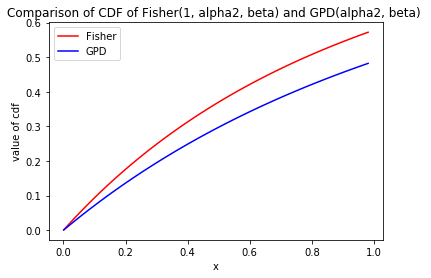

In [39]:
plt.plot(x, y1, 'r', label='Fisher')
plt.plot(x, y2, 'b', label='GPD')
plt.xlabel('x')
plt.ylabel('value of cdf')
plt.legend()
plt.title('Comparison of CDF of Fisher(1, alpha2, beta) and GPD(alpha2, beta) ')
plt.show()

In [40]:
# here we compare the inverse survival functions for GPD and Fisher
# isf for GPD is g(x) = beta * (x ^ ( - 1 / alpha ) - 1 )

In [41]:
x = np.arange(0.001,1,0.02)

In [51]:
y3 =  f.isf(x, 2, 2 * alpha2, loc=0, scale=beta / alpha2)

In [52]:
def GPD_isf(x, alpha, beta):
    return beta * ( pow(x , - 1 / asarray(alpha) ) - 1 )

In [53]:
y4 = GPD_isf(x, alpha2, beta)

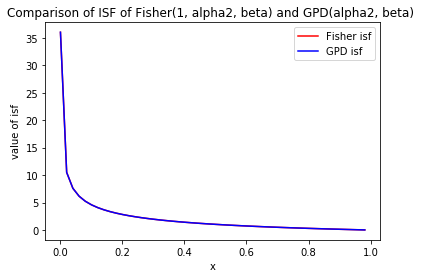

In [54]:
plt.plot(x, y3, 'r', label='Fisher isf')
plt.plot(x, y4, 'b', label='GPD isf')
plt.xlabel('x')
plt.ylabel('value of isf')
plt.legend()
plt.title('Comparison of ISF of Fisher(1, alpha2, beta) and GPD(alpha2, beta) ')
plt.show()

In [55]:
np.divide(y3,y4)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])